In [1]:
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42

import json
import numpy as np
from color import get_color, get_colors
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
from retrieve import retrieve_planner_stats_by_run, retrieve_planner_stats_by_steering
from definitions import *
from utils import *
from mpb import MPB, MultipleMPB

## Stats over different runs with one steer function

In [6]:
cross_name = "corridor_radii"
cross_title = "Corridor Radius"
parameters = [3, 4, 5, 6, 7, 8]
parameter_labels = parameters

def setup(m: MPB, parameter: float):
    m.set_corridor_grid_env(100, 100, branches=100, radius=parameter)    
    m.set_planners(["rrt", "rrt_star", "bit_star", "cforest",
                    "rrt_sharp", "sorrt_star", "informed_rrt_star",
                    "sbpl_arastar", "sbpl_adstar", "sbpl_mha", "prm",
                    "prm_star", "est", "bfmt", "sst", "kpiece", "spars",
                    "spars2", "pdst" ])
    m.set_steer_functions(['reeds_shepp'])

In [ ]:
# cross_name = "turn_radius"
# cross_title = "Turning Radius"
# parameters = [2, 3, 4, 5, 6]
# parameter_labels = parameters

# def setup(m: MPB, parameter: float):
#     m.set_corridor_grid_env(100, 100, branches=100, radius=4)
#     m["steer.car_turning_radius"] = parameter
#     m.set_steer_functions(['reeds_shepp'])
#     m.set_planners(sampling_planners + anytime_planners)

In [ ]:
cross_name = "density"
cross_title = "Obstacle density"
parameters = [0.01, 0.015, 0.02, 0.025, 0.03]
parameter_labels = ["%g %%" % (p * 100) for p in parameters]

def setup(m: MPB, parameter: float):
    m.set_random_grid_env(100, 100, obstacle_ratio=parameter)    
    m.set_planners(["rrt", "rrt_star", "bit_star", "cforest",
                    "rrt_sharp", "sorrt_star", "informed_rrt_star",
                    "sbpl_arastar", "sbpl_adstar", "sbpl_mha", "prm",
                    "prm_star", "est", "bfmt", "sst", "kpiece", "spars",
                    "spars2", "pdst" ])
    m.set_steer_functions(['reeds_shepp'])

Available memory: 20.07 GB, limiting each MPB process to 41.7% usage (8.36 GB).
Creating pool of 6 processes.
Running MPB with ID cross_corridor_radii_3 (log file at cross_corridor_radii/cross_corridor_radii_3.log)...Running MPB with ID cross_corridor_radii_4 (log file at cross_corridor_radii/cross_corridor_radii_4.log)...Running MPB with ID cross_corridor_radii_0 (log file at cross_corridor_radii/cross_corridor_radii_0.log)...Running MPB with ID cross_corridor_radii_1 (log file at cross_corridor_radii/cross_corridor_radii_1.log)...Running MPB with ID cross_corridor_radii_2 (log file at cross_corridor_radii/cross_corridor_radii_2.log)...

Running MPB with ID cross_corridor_radii_5 (log file at cross_corridor_radii/cross_corridor_radii_5.log)...





Killed cross_corridor_radii_5 with planner sorrt_star after 300.00s exceeded timeout.


Error (-9) occurred for MPB with ID cross_corridor_radii_5 using planner SORRT*.
Error (-9) occurred for MPB with ID cross_corridor_radii_4 using planner SORRT*.

Killed cross_corridor_radii_4 with planner sorrt_star after 300.02s exceeded timeout.



Benchmark 1 (cross_corridor_radii_1) finished successfully.

Benchmark 4 (cross_corridor_radii_4) finished successfully.

Benchmark 0 (cross_corridor_radii_0) finished successfully.

Benchmark 5 (cross_corridor_radii_5) finished successfully.

Benchmark 3 (cross_corridor_radii_3) finished successfully.

Benchmark 2 (cross_corridor_radii_2) finished successfully.
All benchmarks succeeded.


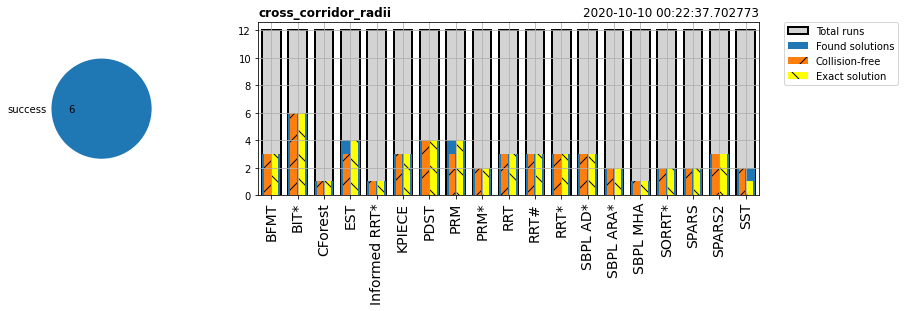

In [7]:
pool = MultipleMPB()
for param in parameters:
    m = MPB()   
    setup(m, param)
    pool.benchmarks.append(m)
run_result = pool.run_parallel("cross_" + cross_name, runs=10, processes=40, limit_memory=True)

In [ ]:
for m in pool.benchmarks:
    m.visualize_trajectory_grid(save_file="cross_%s_traj_%s.pdf" % (cross_name, m.id), headless=True)
    plt.close()

['PRMstar', 'PDST', 'SORRTstar', 'SPARStwo', 'RRT', 'SBPL_ARAstar', 'KPIECE1', 'RRT#', 'PRM', 'SBPL_MHA', 'SBPL_ADstar', 'SPARS', 'RRTstar', 'EST', 'BFMT', 'InformedRRTstar', 'BITstar', 'CForest', 'kBITstar']
['PRMstar', 'PDST', 'SORRTstar', 'SPARStwo', 'RRT', 'SBPL_ARAstar', 'KPIECE1', 'RRT#', 'PRM', 'SBPL_MHA', 'SBPL_ADstar', 'SPARS', 'RRTstar', 'EST', 'BFMT', 'InformedRRTstar', 'BITstar', 'CForest', 'kBITstar']


/home/eric/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/eric/.local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/eric/.local/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/eric/.local/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/eric/.local/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


['PRMstar', 'PDST', 'SORRTstar', 'SPARStwo', 'RRT', 'SBPL_ARAstar', 'KPIECE1', 'RRT#', 'PRM', 'SBPL_MHA', 'SBPL_ADstar', 'SPARS', 'RRTstar', 'EST', 'BFMT', 'InformedRRTstar', 'BITstar', 'CForest', 'kBITstar']


/home/eric/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/eric/.local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/eric/.local/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/eric/.local/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/eric/.local/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


['PRMstar', 'PDST', 'SORRTstar', 'SPARStwo', 'RRT', 'SBPL_ARAstar', 'KPIECE1', 'RRT#', 'PRM', 'SBPL_MHA', 'SBPL_ADstar', 'SPARS', 'RRTstar', 'EST', 'BFMT', 'InformedRRTstar', 'BITstar', 'CForest', 'kBITstar']


/home/eric/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/eric/.local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/eric/.local/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/eric/.local/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/eric/.local/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/eric/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/eric/.local/lib/python3.7/site-packages/n

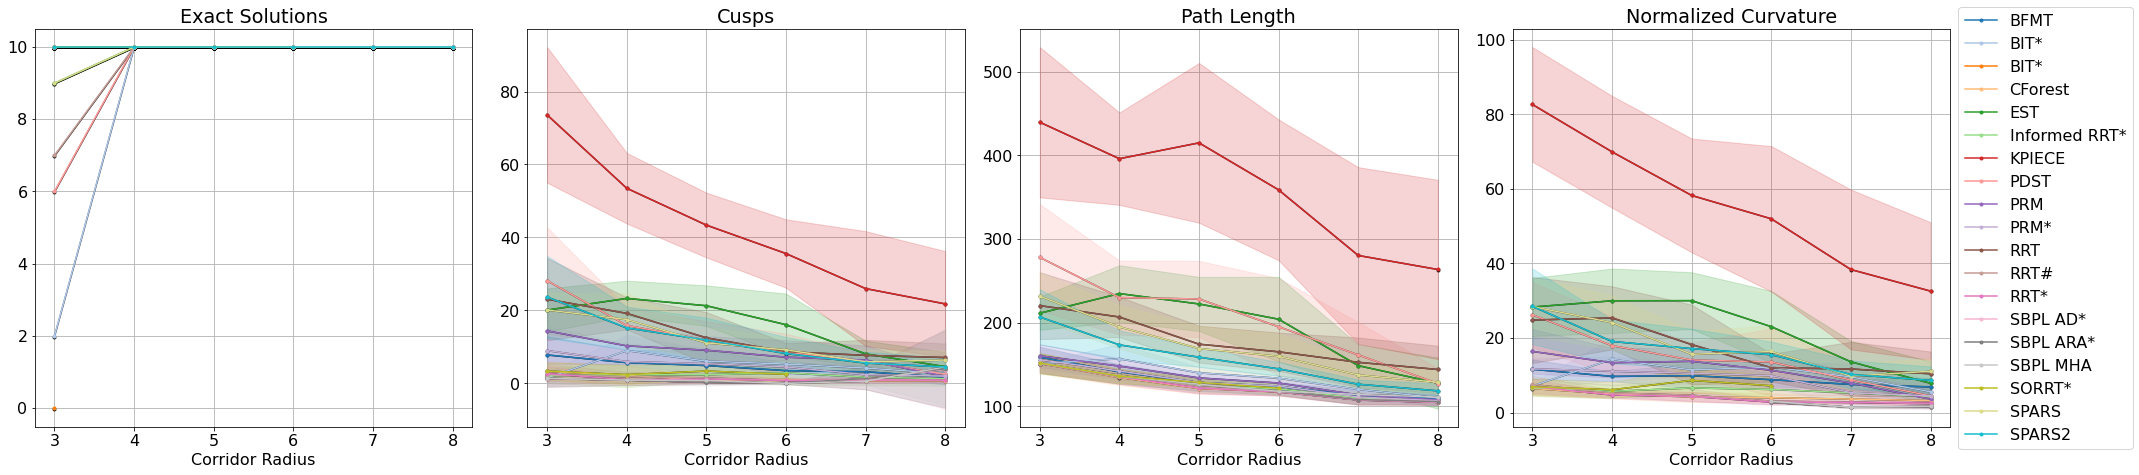

In [10]:
%reload_ext autoreload

ignored_planners = [
    'SBPL', 'SST', 'Theta*'
]

expected_number_of_planners = 15

import matplotlib
matplotlib.rcParams.update({'font.size': 16})


def plot_scenario_parameters(metric: str):
    from matplotlib.ticker import MaxNLocator
    ys = {}
    found_planners = []
    for i, scenario_parameter in enumerate(parameters):
        scenario = pool.benchmarks[i].results_filename
        stats_by_steering = retrieve_planner_stats_by_steering(scenario, steer_funcs='reeds_shepp')
        steering = list(stats_by_steering.values())[0]
    #     print(steering)
        for planner, stats in steering.items():
            if planner in ignored_planners:
                continue
            if planner not in found_planners:
                ys[planner] = {}
                found_planners.append(planner)
            if scenario_parameter not in ys[planner]:
                ys[planner][scenario_parameter] = []
            if metric == "cusps":
                ys[planner][scenario_parameter] += [len(v[metric]) for v in stats.values() if v["exact_goal_path"] and v["path_found"]]
            elif metric == "exact_solutions":
                ys[planner][scenario_parameter] += [sum([1 for v in stats.values() if v["exact_goal_path"] and v["path_found"]])]
            else:
                ys[planner][scenario_parameter] += [v[metric] for v in stats.values() if v["exact_goal_path"] and v["path_found"]]

    plt.gca().set_axisbelow(True)
    plt.grid()
    
    if metric == "exact_solutions":
        plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

    print(found_planners)

    means = []
    stds = []
    for pi, planner in enumerate(sorted(found_planners, key=convert_planner_name)):
        if len(ys[planner].values()) == 0:
            print("No results for planner", convert_planner_name(planner))
            continue

        means, stds = [], []
        for scenario_parameter in parameters:
            if scenario_parameter not in ys[planner]:
                means.append(np.nan)
                stds.append(np.nan)
                continue
            means.append(safe_mean(ys[planner][scenario_parameter]))
            stds.append(safe_std(ys[planner][scenario_parameter]))

        means = np.array(means)
        stds = np.array(stds)
        plt.fill_between(parameters, means-stds, means+stds, alpha=0.2, color=get_color(pi, num_colors=20), zorder=2)
        # add some shadow below the plot
        plt.plot(parameters, means - 0.02, '.-', color=(0, 0, 0, .8), zorder=3)
        plt.plot(parameters, means, '.-', color=get_color(pi, num_colors=20), label=convert_planner_name(planner), zorder=4)
    # plt.gca().set_xlim([-0.5, len(steer_funcs) + 0.5])
    if metric in stat_names:
        plt.title(stat_names[metric]);
    else:
        plt.title(metric)
    
    # Shrink current axis by 20%
    ax = plt.gca()
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.set_xlabel(cross_title)
    ax.set_xticks(parameters)
    ax.set_xticklabels(parameter_labels)


plt.figure(figsize=(30, 7))
plt.subplot(1, 4, 1)
plot_scenario_parameters("exact_solutions")
plt.subplot(1, 4, 2)
plot_scenario_parameters("cusps")
plt.subplot(1, 4, 3)
plot_scenario_parameters("path_length")
plt.subplot(1, 4, 4)
plot_scenario_parameters("normalized_curvature")

# Put a legend to the right of the current axis
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('cross_%s.png' % cross_name, dpi=300, bbox_inches='tight')
plt.savefig('cross_%s.pdf' % cross_name, dpi=300, bbox_inches='tight')